# DL Sbert visualizations

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import math
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [11]:
cwd = os.getcwd()
parent_folder = os.path.split(os.path.abspath(cwd))[0]
data = os.path.join(parent_folder, '/siamese_loss.txt')
data = r'/Users/annabramslow/Documents/SBert/DL-SBert/siamese_loss.txt'

In [13]:
#read txt file
df = pd.read_csv(data, sep=" ", header=None)

In [43]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2023-11-24,"08:20:57,575",-,INFO,-,Mean,loss,for,training,step,10000.000000,:,NaN,0.092132
1,2023-11-24,"08:41:23,778",-,INFO,-,Mean,loss,for,training,step,20000.000000,:,NaN,0.072904
2,2023-11-24,"09:01:46,727",-,INFO,-,Mean,loss,for,training,step,30000.000000,:,NaN,0.067922
3,2023-11-24,"09:22:09,440",-,INFO,-,Mean,loss,for,training,step,40000.000000,:,NaN,0.064454
4,2023-11-24,"09:42:31,640",-,INFO,-,Mean,loss,for,training,step,50000.000000,:,NaN,0.062254
5,2023-11-24,"10:02:55,768",-,INFO,-,Mean,loss,for,training,step,60000.000000,:,NaN,0.060078
6,2023-11-24,"10:23:16,274",-,INFO,-,Mean,loss,for,training,step,70000.000000,:,NaN,0.058744
7,2023-11-24,"10:43:39,258",-,INFO,-,Mean,loss,for,training,step,80000.000000,:,NaN,0.057213
8,2023-11-24,"11:04:01,351",-,INFO,-,Mean,loss,for,training,step,90000.000000,:,NaN,0.055764
9,2023-11-24,"11:24:23,746",-,INFO,-,Mean,loss,for,training,step,100000.000000,:,NaN,0.054795


In [44]:
siamese_loss = pd.DataFrame()

siamese_loss['step'] = df[10]
siamese_loss['loss'] = df[13]

In [46]:
#drop rows with nan values in loss column
siamese_loss = siamese_loss.dropna()

In [54]:
#reset index
siamese_loss = siamese_loss.reset_index(drop=True)

In [55]:
#change step column so that  if the value is below its previous value then the value should be the previous value + 10000
for i in range(1, len(siamese_loss)):
    if siamese_loss['step'][i] < siamese_loss['step'][i-1]:
        siamese_loss['step'][i] = siamese_loss['step'][i-1] + 10000
    else:
        siamese_loss['step'][i] = siamese_loss['step'][i]

siamese_loss

,step,loss
0,10000.0,0.092132
1,20000.0,0.072904
2,30000.0,0.067922
3,40000.0,0.064454
4,50000.0,0.062254
5,60000.0,0.060078
6,70000.0,0.058744
7,80000.0,0.057213
8,90000.0,0.055764
9,100000.0,0.054795


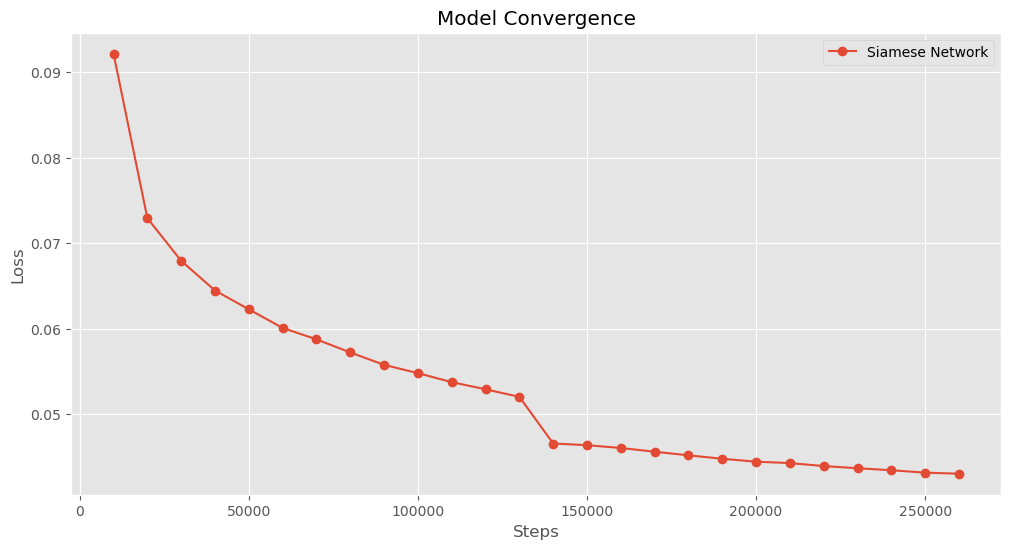

In [60]:
# plot loss over steps as connected dots
plt.plot(siamese_loss['step'], siamese_loss['loss'], 'o-',label='Siamese Network')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Model Convergence')
plt.legend()
plt.show()